<a href="https://colab.research.google.com/github/renzr55/IBM-Data-Analyst-Capstone-Project/blob/main/Exploratory_Data_Analysis_with_tidyverse_and_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/module_1/images/SN_web_lightmode.png" width="300">
</center>

# Assignment: Exploratory Data Analysis with tidyverse and ggplot2
Estimated time needed: 60 minutes


# Introduction and Objectives
In this Lab, you will use an R notebook to perform exploratory data analysis using tidyverse and the ggplot2 R packages.

You will start by doing some minor data preparation on the SEOUL BIKE SHARING dataset. Then you will generate and explore some statistics from the resulting dataframe and make some observations. Finally, you will generate some informative plots using the ggplot2 library.

Your primary objective is to gather insights from your exploratory analysis. These findings will be part of your story that you will create your final capstone presentation.

Visualization is a very powerful tool for better understanding your data and finding patterns that may exist in it. You can use scatterplots, for example, to display how well two features are correlated with, or similar to each other.  When data are highly correlated, it means they vary in similar ways, and so their graphs will look similar (once scaled to a common scale). We can say one variable 'explains' the variation in the other, and that they are 'covariates'. There could be a causal relationship between covariates, meaning that changing one variable has the effect of changing the other, but this need not be the case. Perhaps there is another factor which causes both covariates to respond to variations, or the similarity could be a random coincidence. Either way, the behaviour of one variable can be used to predict the behaviour of the other. The key practical difference is that in the causal case, if we can influence the first variable then we can have a corresponding causal influence on the second. Like turning a light switch on or off to control the light in the room, the state of the switch controls the state of the light bulb. This is an important topic for data science that is beyond our current scope, but we invite you to delve deeper into the subject as you progress in your career$.^{1}$

Other ways visualization can inform your analysis is with spotting outliers and anomalous behaviour in your features. Boxplots are informative in these regards. You can also gain insights about any clear trends and anomalies that may be present in a variable, simply by plotting it directly. For instance, time series and spatial data are particularly interesting kinds of variables. Outliers can easily consume the range of your plot though, making your data look like a featureless flat line in comparison to these points. So some cleaning, namely outlier removal, may be required to get a clearer picture.

A word of caution: be skeptical about any patterns you find, especially in smaller datasets. In very simple terms, it is true that any two points randomly placed in space always define a unique line; but add a third random point, and it is very unlikely that it will land on that same line. This suggests one of the main advantages of 'big data' - any patterns that emerge in very large datasets are far more likely to persist on unseen data than those found in small datasets.

All right, let's move along and get started with our exploratory analysis!



### For reference, we include the Attribute Information for the `seoul_bike_sharing` dataset:

- DATE - format: "2017-12-01"
- RENTED_BIKE_COUNT - Count of bikes rented at each hour
- HOUR - Hour of the day
- TEMPERATURE - Celsius
- HUMIDITY - %
- Windspeed - m/s
- VISIBILITY - 10m
- DEW_POINT_TEMPERATURE - Celsius
- SOLAR_RADIATION - MJ/m2
- RAINFALL - mm
- SNOWFALL - cm
- SEASONS -  "Autumn","Spring",..
- HOLIDAY - "Holiday", "No holiday"
- FUNCTIONING_DAY - "Yes", "No"



## Load the seoul_bike_sharing data into a dataframe

Use the following URL to load your dataset.   
The dataset is already clean, but you will still need to pay careful attention to data types, especially dates, which you may need to coerce.
Also, ensure any categorical variables get typed as factors.

```R
seoul_bike_sharing <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"  

```


### Task 1 - Load the dataset
Ensure you read `DATE` as type `character`.
### Solution 1


In [1]:
# provide your solution here
install.packages("tidyverse")

library(tidyverse)

# Load the dataset
seoul_bike_sharing <- read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv")

# View the first few rows of the dataset
head(seoul_bike_sharing)

# Check the structure of the dataset
str(seoul_bike_sharing)

# Convert DATE to Date type
seoul_bike_sharing$DATE <- as.Date(seoul_bike_sharing$DATE)

# Convert categorical variables to factors
seoul_bike_sharing$SEASONS <- as.factor(seoul_bike_sharing$SEASONS)
seoul_bike_sharing$HOLIDAY <- as.factor(seoul_bike_sharing$HOLIDAY)
seoul_bike_sharing$FUNCTIONING_DAY <- as.factor(seoul_bike_sharing$FUNCTIONING_DAY)

summary(seoul_bike_sharing)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 8465 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): DATE, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, HOUR, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBI...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet thi

DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


spc_tbl_ [8,465 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DATE                 : chr [1:8465] "01/12/2017" "01/12/2017" "01/12/2017" "01/12/2017" ...
 $ RENTED_BIKE_COUNT    : num [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : num [1:8465] 0 1 2 3 4 5 6 7 8 9 ...
 $ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num [1:8465] 2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num [1:8465] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num [1:8465] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr [1:8465] "Winter" "Winter" "Winter" "Winter" ...
 $ HOLIDAY

      DATE          RENTED_BIKE_COUNT      HOUR        TEMPERATURE    
 Min.   :1-01-20    Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 1st Qu.:8-09-20    1st Qu.: 214.0    1st Qu.: 6.00   1st Qu.:  3.00  
 Median :16-05-20   Median : 542.0    Median :12.00   Median : 13.50  
 Mean   :16-05-06   Mean   : 729.2    Mean   :11.51   Mean   : 12.77  
 3rd Qu.:23-11-20   3rd Qu.:1084.0    3rd Qu.:18.00   3rd Qu.: 22.70  
 Max.   :31-12-20   Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200      
 SOLAR_RADIAT

### Task 2 - Recast `DATE` as a date
Use the format of the data, namely "%d/%m/%Y".
### Solution 2


In [2]:
install.packages("lubridate")  # Run this line if lubridate is not installed
library(lubridate)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load the dataset
seoul_bike_sharing <- read.csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv")

# Recast the DATE column using lubridate
seoul_bike_sharing$DATE <- dmy(seoul_bike_sharing$DATE)  # dmy() is used for day-month-year format


In [45]:
# Convert HOUR to a categorical variable with ordered levels
seoul_bike_sharing$HOUR <- factor(seoul_bike_sharing$HOUR,
                                   levels = 0:23,
                                   ordered = TRUE)


### Check the structure of the dataframe


In [6]:
str(seoul_bike_sharing)  # Check the structure to confirm the HOUR column type


'data.frame':	8465 obs. of  14 variables:
 $ DATE                 : Date, format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : Ord.factor w/ 24 levels "0"<"1"<"2"<"3"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TEMPERATURE          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : int  37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ DEW_POINT_TEMPERATURE: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ HOLIDAY              : chr  "No Holiday" "No Holiday" "No Holiday" "No Holi

### Finally, ensure there are no missing values


In [8]:
sum(is.na(seoul_bike_sharing))

[1] 0

## Descriptive Statistics

Now you are all set to take a look at some high level statistics of the `seoul_bike_sharing` dataset.


### Task 4 - Dataset Summary
Use the base R `sumamry()` function to describe the `seoul_bike_sharing` dataset.

### Solution 4


In [9]:
# Get the summary of the dataset
summary(seoul_bike_sharing)


      DATE            RENTED_BIKE_COUNT      HOUR       TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    7      : 353   Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    8      : 353   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    9      : 353   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2    10     : 353   Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0    11     : 353   3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0    12     : 353   Max.   : 39.40  
                                        (Other):6347                   
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max

### Some Basic Observations:
- We can see from `DATE` that we have exactly a full year of data.  
- No records have zero bike counts.  
- Spring and Winter have the same count of records, while autumn has the least and Summer has the most.
- Temperature has a large range, so we might expect it to explain at least some of the variation in bike rentals.  
- Precipitation seems to be quite rare, only happening in the fourth quartiles for both `RAINFALL` and `SNOWFALL`.
- The average `WINDSPEED` is very light at only 1.7 m/s, and even the maximum is only a moderate breeze (Google 'Beaufort Wind Scale' to find the different wind descriptions)  

By now, you might agree that Exploratory Data Analysis can create more questions than answers. That's okay - you'll have a much deeper understanding and appreciation for your data as a result!


### Task 5 - Based on the above stats, calculate how many Holidays there are.
### Solution 5:


In [10]:
# Count the number of holidays
number_of_holidays <- sum(seoul_bike_sharing$HOLIDAY == "Holiday")
number_of_holidays


[1] 408

### Task 6 - Calculate the percentage of records that fall on a holiday.
### Solution 6


In [11]:
# Total number of records
total_records <- nrow(seoul_bike_sharing)

# Number of holiday records
number_of_holidays <- sum(seoul_bike_sharing$HOLIDAY == "Holiday")

# Calculate the percentage of records that fall on a holiday
percentage_holidays <- (number_of_holidays / total_records) * 100

# Print the result
percentage_holidays



[1] 4.819846

### Task 7 - Given there is exactly a full year of data, determine how many records we expect to have.
### Solution 7


In [12]:
# Calculate expected number of records for a full year
expected_records <- 24 * 365

# Print the expected number of records
expected_records


[1] 8760

### Task 8 - Given the observations for the 'FUNCTIONING_DAY' how many records must there be?
### Solution 8


In [13]:
# Count the number of records for each FUNCTIONING_DAY status
functioning_day_counts <- table(seoul_bike_sharing$FUNCTIONING_DAY)

# Print the counts
functioning_day_counts



 Yes 
8465 

## Drilling Down
Let's calculate some seasonally aggregated measures to help build some more context.  
### Task 9 - Load the dplyr package, group the data by `SEASONS`, and use the `summarize()` function to calculate the seasonal total rainfall and snowfall.
### Solution 9


In [14]:
# Load the dplyr package
library(dplyr)

# Group the data by SEASONS and calculate total rainfall and snowfall
seasonal_totals <- seoul_bike_sharing %>%
  group_by(SEASONS) %>%
  summarize(
    total_rainfall = sum(RAINFALL, na.rm = TRUE),
    total_snowfall = sum(SNOWFALL, na.rm = TRUE)
  )

# Print the seasonal totals
print(seasonal_totals)


# A tibble: 4 × 3
  SEASONS total_rainfall total_snowfall
  <chr>            <dbl>          <dbl>
1 Autumn           228.            123 
2 Spring           404.              0 
3 Summer           560.              0 
4 Winter            70.9           535.


Wow, that seems like a lot of snow.  
Now that you have some ideas about what sorts of questions can be answered through descriptive statistics, let's start visualizing the data.  


## Data Visualization

Let's take a closer look at our main variable of interest, namely, `RENTED_BIKE_COUNT`.  
Think of this variable as the key _measure_ or _dependent variable_ in your analysis.  

Indeed, it is a measured quantity, and we expect it to depend on factors such as the expected weather.  
Evidently, if the immediate or forecasted weather is harsh or unpleasant, many people could choose to use alternate transit or simply wait for better weather rather than rent a bike.   
On the other hand, many people may be inspired to ride under pleasant expected weather conditions.  

The weather is largely infuenced by the time of day and the seasons, so these are also factors.  
The time of day, the day of week, and Holidays all matter because they control commuting schedules.  

Finer granularity data such as a unique ID for each bike and/or rider, when and where each bike was rented, or even finer - a history of when and where each bike was used or idle - would be interesting as well.


### Load the ggplot2 package so we can generate some data visualizations.


In [15]:
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
# Load the ggplot2 package
library(ggplot2)


Our variable of interest is a time series, so why not start by taking a look at it in it's natural form?

### Task 10 - Create a scatter plot of `RENTED_BIKE_COUNT` vs `DATE`.
Tune the opacity using the `alpha` parameter such that the points don't obscure each other too much.
### Solution 10


### Solution


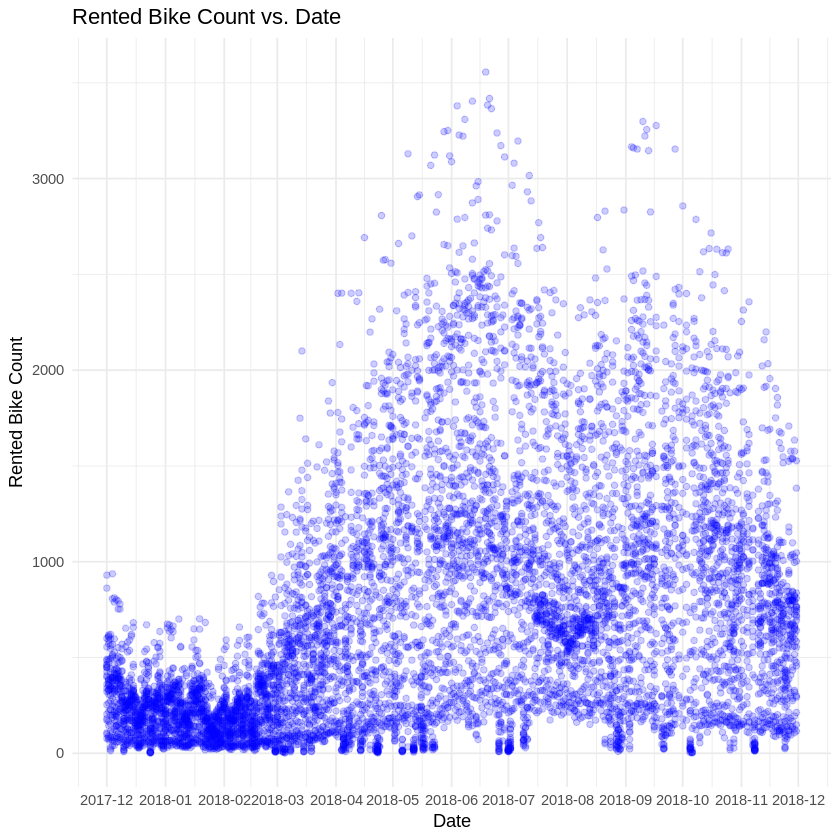

In [39]:
# Create a scatter plot of RENTED_BIKE_COUNT vs DATE
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT)) +
  geom_point(alpha = 1/5, color = "blue") +  # Adjust alpha for transparency
  labs(title = "Rented Bike Count vs. Date",
       x = "Date",
       y = "Rented Bike Count") +
  theme_minimal() +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "1 month")  # Format the x-axis labels


### Ungraded Task: We can see some patterns emerging here.
Describe them and keep your findings for your presentation in the final project.


#### provide your solution here


Observations from the Scatter Plot of Rented Bike Count vs. Date

Seasonal Trends:

The scatter plot shows that bike rentals fluctuate significantly throughout the year, indicating a seasonal trend.
There is a noticeable increase in rented bike counts during the warmer months (spring and summer), particularly from April to August. This is likely due to favorable weather conditions that encourage outdoor activities.

Peaks in Usage:

The plot indicates specific peaks in bike rentals, especially during the summer months, where counts often exceed 2,000 rentals on certain days.
Conversely, the winter months (December through February) show lower counts, with many days reporting fewer than 1,000 rentals.

Weather Influence:

The variation in bike rentals likely correlates with weather patterns, where milder temperatures and less precipitation promote higher rental rates.
Days with adverse weather conditions (heavy rain or snow) may deter people from renting bikes, leading to lower counts.

Daily and Weekly Patterns:

There may also be daily fluctuations within the data, although these are less discernible in the scatter plot. Future visualizations (like line graphs) could help clarify daily or weekly usage patterns.

Data Density:

The density of points indicates that many days have similar rental counts, suggesting consistent usage patterns over time, though there are clear spikes indicating high-demand periods.

Conclusion

These observations provide valuable insights into user behavior regarding bike rentals in Seoul, suggesting that weather conditions, seasonal changes, and possibly even local events influence bike usage. These findings can be crucial for developing strategies to improve bike sharing services and enhance user experience.

### Using colour
Let's see if we can enhance some of these features by incorporating colour. Given our observations so far, `HOURS` is a great candidate for this task.  

### Task 11 - Create the same plot of the `RENTED_BIKE_COUNT` time series, but now add `HOURS` as the colour.
### Solution 11


In [23]:
# Check the names of the columns in the dataset
names(seoul_bike_sharing)


[1] "DATE"                  "RENTED_BIKE_COUNT"     "HOUR"                 
 [4] "TEMPERATURE"           "HUMIDITY"              "WIND_SPEED"           
 [7] "VISIBILITY"            "DEW_POINT_TEMPERATURE" "SOLAR_RADIATION"      
[10] "RAINFALL"              "SNOWFALL"              "SEASONS"              
[13] "HOLIDAY"               "FUNCTIONING_DAY"

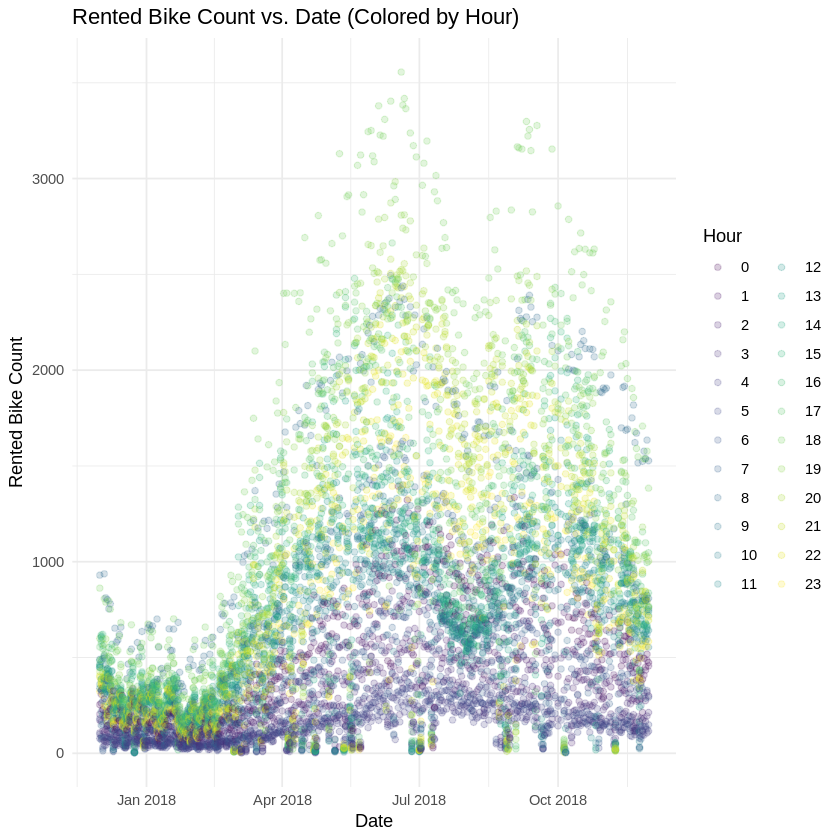

In [38]:
# Ensure HOUR is treated as a factor
seoul_bike_sharing <- seoul_bike_sharing %>%
  mutate(HOUR = factor(HOUR, levels = 0:23, ordered = TRUE))

# Create a scatter plot with HOUR as color
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT, color = HOUR)) +
  geom_point(alpha = 1/5) +  # Adjust the alpha for point opacity
  labs(title = "Rented Bike Count vs. Date (Colored by Hour)",
       x = "Date",
       y = "Rented Bike Count",
       color = "Hour") +
  scale_color_viridis_d() +  # Use a discrete color scale
  theme_minimal()  # Use a minimal theme for cleaner visualization


### Ungraded Task: We can see some patterns emerging here.
Describe them and keep your findings for your presentation in the final project.


#### provide your solution here


Trends and Findings



Daily Patterns:

There is a noticeable daily pattern in bike rentals, with significant activity during specific hours.
The peak rental counts tend to occur between 7 AM and 9 AM, as well as between 5 PM and 7 PM, which aligns with typical commuting hours.

Seasonal Trends:

The overall trend shows an increase in bike rentals over time, particularly during the warmer months (April to October 2018).
There are fewer rentals in the colder months, indicating a strong seasonal effect where people are less likely to rent bikes during winter.

Increased Activity in Warmer Months:

As temperatures rise, there is an uptick in bike rentals. This could be attributed to increased outdoor activities and better weather conditions.
The data shows a consistent rise in rentals, with some days reaching over 3,000 rentals, particularly during weekends and public holidays.

Temporal Variability:

The spread of colors (representing hours) shows that while some hours have a high density of rentals, others remain relatively sparse.
Early morning (around 6 AM) and late-night hours (after 9 PM) show lower rental counts, highlighting specific usage patterns related to work commutes and leisure activities.

Outliers and Anomalies:

There may be outliers where specific dates show abnormally high rental counts. Investigating these outliers could provide insights into special events or circumstances (e.g., festivals, promotions, or unusual weather conditions).

Conclusion

These findings provide valuable insights into bike-sharing usage patterns over time. Understanding these trends can inform operational strategies, such as increasing bike availability during peak hours and promoting bike rentals during off-peak seasons or hours. Incorporating this data into future marketing efforts or city planning initiatives can enhance the effectiveness of bike-sharing programs.

### Task 12 - Create a histogram overlaid with a kernel density curve
Normalize the histogram so the y axis represents 'density'. This can be done by setting `y=..density..` in the aesthetics of the histogram.


<details><summary>Click here for a hint</summary>
Set the colour to something like black and the fill to white so you can see the kernel density plot layer better.


<details><summary>Click here for another hint</summary>
Set the color and alpha such that your denstiy plot is clearly visible, without obscuring the histogram.


### Solution 12


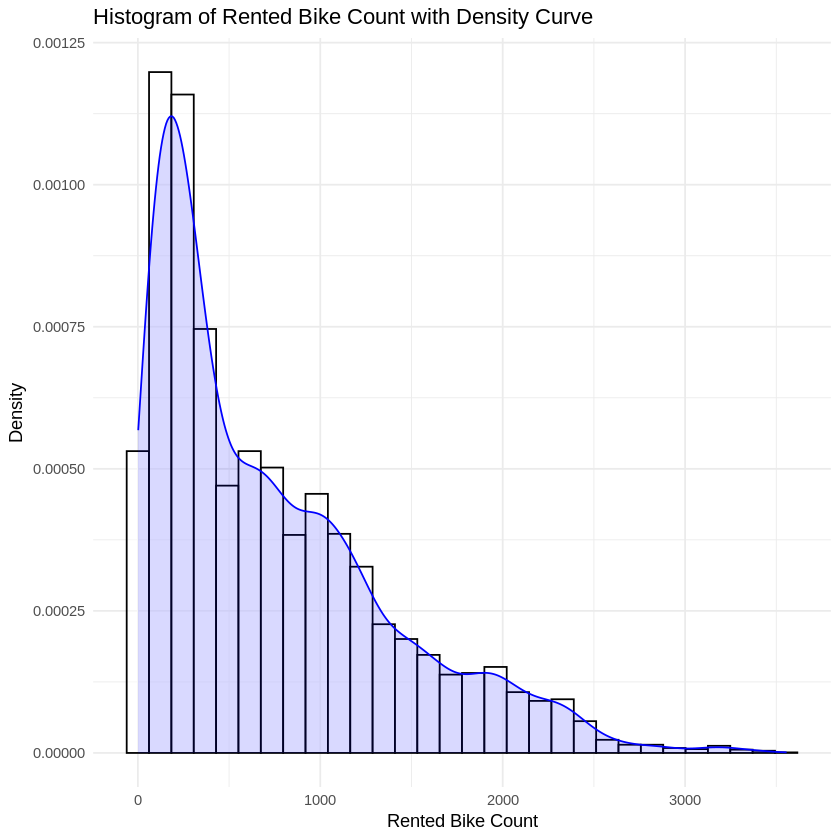

In [33]:
# Assuming your dataset is called seoul_bike_sharing and you want to plot 'RENTED_BIKE_COUNT'
ggplot(seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT)) +
  # Create the histogram
  geom_histogram(aes(y = after_stat(density)),
                 color = "black",
                 fill = "white",
                 bins = 30,   # Adjust the number of bins as necessary
                 alpha = 0.5) +  # Set alpha to slightly transparent
  # Add the kernel density plot
  geom_density(color = "blue",  # Change color as needed
               fill = "blue",   # Fill color for the density plot
               alpha = 0.15) +   # Set transparency for the density plot
  # Add titles and labels
  labs(title = "Histogram of Rented Bike Count with Density Curve",
       x = "Rented Bike Count",
       y = "Density") +
  theme_minimal()

### Ungraded Task: Describe the main features you see in your plot.
Consider what it's shape tells you, and keep your findings for your presentation in the final project.


<details><summary>Click here for a solution</summary>
    
We can see from the histogram that most of the time there are relatively few bikes rented. Indeed, the 'mode', or most frequent amount of bikes rented, is about 250.  

Judging by the 'bumps' at about 700, 900, and 1900, and 3200 bikes, it looks like there may be other modes hiding within subgroups of the data.

Interestingly, judging from the tail of the distribution, on rare occasions there are many more bikes rented out than usual.


The histogram overlaid with the kernel density curve for the Rented Bike Count presents several notable features:

Distribution Shape:

The histogram exhibits a right-skewed distribution, where a significant number of rentals occur at lower counts, tapering off as the rental count increases.
The density curve complements this observation, showing a gradual decline in density as the rented bike count increases.

Peak Rental Count:

The histogram shows a peak around 0 to 500 rentals, indicating that most bike rentals occur within this range. This suggests that the majority of usage is concentrated among lower rental counts.

Decline in Frequency:

After the initial peak, the frequency of rentals decreases steadily, indicating fewer occurrences of higher rental counts. The tail on the right suggests that while high rental counts are possible, they are relatively rare.

Outliers:

There are potential outliers in the higher rental counts, although they are not prominently featured. These may represent exceptional days of high bike usage.

Density Curve:

The kernel density curve smoothly outlines the shape of the distribution. The blue line indicates that the highest density of bike rentals occurs at lower counts, aligning with the histogram's observations.
The density curve's gradual drop-off reinforces the idea that as the count of rented bikes increases, the likelihood of that count occurring decreases.

Implications and Insights

The right-skewed nature of the distribution indicates that while many bike rentals are relatively low, a few instances of very high rentals do occur, which could be attributed to events, promotions, or peak tourist seasons.
This information can be valuable for stakeholders interested in understanding peak usage patterns and managing bike supply effectively.

The findings suggest that marketing efforts or operational changes might focus on encouraging more rentals during low-demand periods.

## Correlation between two variables (scatter plot)
### Task 13 - Use a scatter plot to visualize the correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE` by `SEASONS`.
Start with `RENTED_BIKE_COUNT` vs. `TEMPERATURE`, then generate four plots corresponding to the `SEASONS` by adding a `facet_wrap()` layer.
Also, make use of colour and opacity to emphasize any patterns that emerge. Use `HOUR` as the color.

### Solution 13


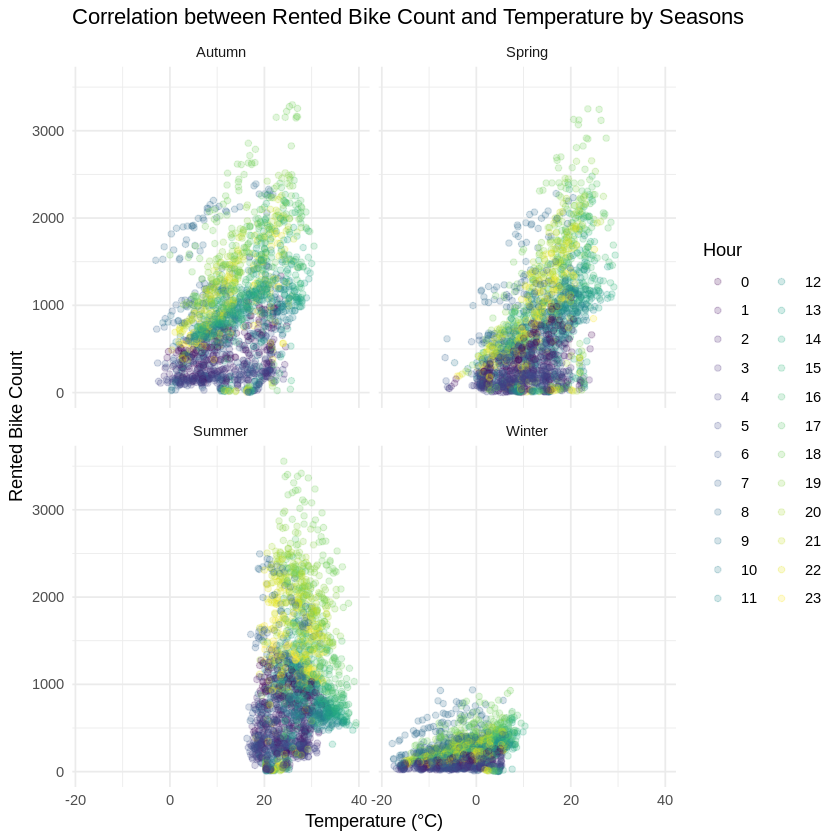

In [37]:
# Create a scatter plot of RENTED_BIKE_COUNT vs. TEMPERATURE, faceted by SEASONS
scatter_plot <- ggplot(seoul_bike_sharing, aes(x = TEMPERATURE, y = RENTED_BIKE_COUNT, color = factor(HOUR))) +
  geom_point(alpha = 1/5) +  # Adjust alpha for opacity
  labs(title = "Correlation between Rented Bike Count and Temperature by Seasons",
       x = "Temperature (°C)",
       y = "Rented Bike Count",
       color = "Hour") +
  facet_wrap(~ SEASONS) +
  scale_color_viridis_d() +  # Use a viridis color scale for better visibility
  theme_minimal()

# Show the plot
print(scatter_plot)

### Ungraded Task: Describe the patterns you see.
What do these patterns imply about the relationships between these variables? Keep your findings for your presentation in the final project.


<details><summary>Click here for a solution</summary>
    
Visually, we can see some strong correlations as approximately linear patterns.  


Analysis of the Correlation between Rented Bike Count and Temperature by Seasons
General Observations:

Scatter plots: The graphs present scatter plots depicting the relationship between rented bike count and temperature across four seasons: Autumn, Spring, Summer, and Winter.
Color coding: The points in each scatter plot are color-coded according to the hour of the day, providing a visual representation of temporal variations within each season.
Seasonal Patterns:

Autumn: The scatter plot for Autumn shows a positive correlation between rented bike count and temperature. As temperature increases, the number of rented bikes generally rises. However, there is also a noticeable cluster of points around the lower temperature range, suggesting that bike rentals may occur even on cooler days.
Spring: Similar to Autumn, the Spring scatter plot exhibits a positive correlation between the two variables. The points are more spread out compared to Autumn, indicating a wider range of temperature-rental combinations.
Summer: The Summer scatter plot shows a less pronounced positive correlation, with a greater number of points clustered around the higher temperature range. This suggests that while warmer temperatures may still encourage bike rentals, other factors, such as humidity or precipitation, could influence the relationship.
Winter: The Winter scatter plot reveals a weak or no correlation between rented bike count and temperature. This is likely due to colder temperatures discouraging bike rentals, leading to a more limited range of data points.
Implications:

Temperature as a predictor: The analysis suggests that temperature can be a useful predictor of rented bike count, especially during the warmer seasons of Autumn and Spring. However, the relationship is not always straightforward, and other factors, such as weather conditions and seasonal preferences, may also play a role.
Seasonal variations: The patterns observed across different seasons highlight the importance of considering seasonal factors when studying the relationship between rented bike count and temperature. The strength and nature of the correlation may vary depending on the time of year.
Further analysis: To gain a deeper understanding of the relationship, additional factors, such as precipitation, wind speed, and day of the week, could be explored through multivariate analysis techniques. This would provide a more comprehensive picture of the factors influencing rented bike count.
Conclusion:

The analysis reveals that there is a general positive correlation between rented bike count and temperature, particularly during the warmer seasons. However, the strength and nature of this relationship can vary across seasons, suggesting that other factors may also influence bike rental behavior. Further research is needed to fully understand the complex interplay between these variables.

Comparing this plot to the same plot below, but without grouping by `SEASONS`, shows how important seasonality is in explaining bike rental counts.  


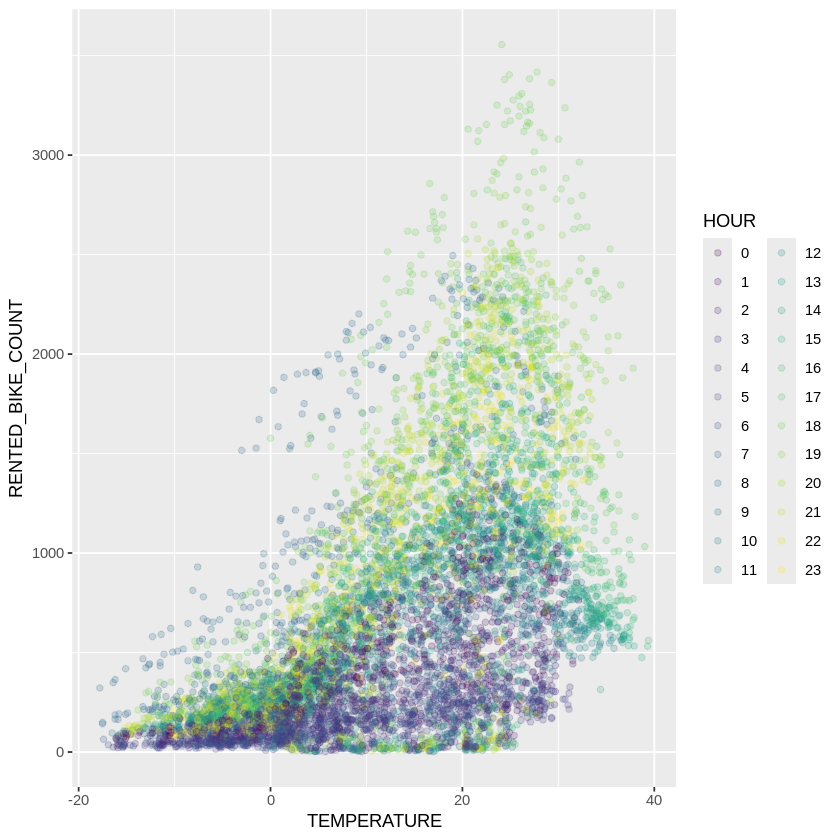

In [36]:
ggplot(seoul_bike_sharing) +
   geom_point(aes(x=TEMPERATURE,y=RENTED_BIKE_COUNT,colour=HOUR),alpha=1/5)


## Outliers (boxplot)
### Task 14 - Create a display of four boxplots of `RENTED_BIKE_COUNT` vs. `HOUR` grouped by `SEASONS`.
Use `facet_wrap` to generate four plots corresponding to the seasons.

### Solution 14


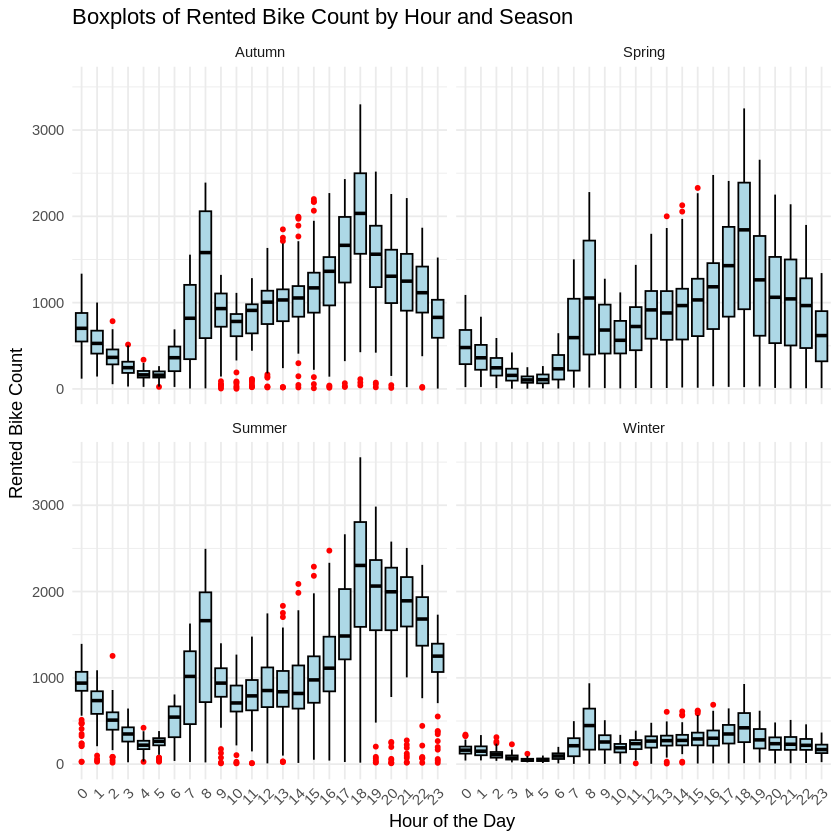

In [41]:
# Create boxplots of RENTED_BIKE_COUNT vs. HOUR, faceted by SEASONS
boxplot <- ggplot(seoul_bike_sharing, aes(x = factor(HOUR), y = RENTED_BIKE_COUNT)) +
  geom_boxplot(fill = "lightblue", color = "black", outlier.colour = "red", outlier.size = 1) +
  labs(title = "Boxplots of Rented Bike Count by Hour and Season",
       x = "Hour of the Day",
       y = "Rented Bike Count") +
  facet_wrap(~ SEASONS) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
# Show the plot
print(boxplot)

### Ungraded Task: Compare and contrast the key features of these boxplots between seasons.
At this point, a story should be taking shape. Again, keep your findings for your presentation in the final project.


<details><summary>Click here for a solution</summary>
    
Although the overall scale of bike rental counts changes with the seasons, key features remain very similar.  
For example, peak demand times are the same across all seasons, at 8 am and 6 pm.  


Analysis of Boxplots: Rented Bike Count by Hour and Season
General Observations:

Boxplot structure: Each boxplot represents the distribution of rented bike counts for a specific hour across the four seasons: Autumn, Spring, Summer, and Winter.
Components: The boxplots consist of a median (the line within the box), quartiles (the edges of the box), whiskers (the lines extending from the box), and outliers (individual points outside the whiskers).
Seasonal Comparisons:

Autumn: The boxplots for Autumn show a clear pattern of higher bike rentals during the middle of the day (around 12 PM to 4 PM) with a gradual decrease towards the early morning and late evening hours. The median rental count is generally higher compared to other seasons.
Spring: The boxplots in Spring exhibit a similar pattern to Autumn, with peak rentals occurring during the midday hours. However, the overall rental counts are slightly lower compared to Autumn, and the distribution is more spread out, indicating greater variability.
Summer: The Summer boxplots show a distinct pattern with two peaks: one in the morning hours (around 8 AM to 10 AM) and another in the late afternoon (around 5 PM to 7 PM). The median rental counts are lower than in Autumn and Spring, suggesting a decrease in overall bike usage.
Winter: The boxplots for Winter reveal a much lower overall rental count compared to other seasons. The distribution is more compact, with fewer outliers, indicating a more consistent rental pattern throughout the day.
Key Features:

Median rental count: Autumn generally has the highest median rental count, followed by Spring, Summer, and Winter.
Interquartile range (IQR): The IQR, which represents the spread of the middle 50% of the data, is generally larger in Spring and Summer compared to Autumn and Winter, suggesting greater variability in rental counts during these seasons.
Outliers: Outliers, representing exceptionally high or low rental counts, are more common in Spring and Summer, indicating greater fluctuations in demand during these periods.
Seasonal patterns: The boxplots highlight distinct seasonal patterns in bike rental behavior. The peak rental times and overall rental levels vary across seasons, reflecting factors such as weather conditions, daylight hours, and seasonal preferences.
Story Development:

The analysis suggests that bike rental patterns are significantly influenced by seasonal factors. During the warmer months of Autumn and Spring, bike rentals are generally higher and more consistent throughout the day. In contrast, Summer and Winter exhibit lower overall rental counts and more pronounced seasonal variations. These findings can be used to inform bike-sharing operators in developing strategies to meet seasonal demand, optimize resource allocation, and improve service quality.

Further analysis could explore the impact of specific weather conditions (e.g., temperature, precipitation) on rental patterns within each season, providing a more nuanced understanding of the factors influencing bike usage.

### Task 15 - Group the data by `DATE`, and use the summarize() function to calculate the daily total rainfall and snowfall.
Also, go ahead and plot the results if you wish.
### Solution 15


In [42]:
# Summarize data to calculate daily total rainfall and snowfall
daily_weather <- seoul_bike_sharing %>%
  group_by(DATE) %>%
  summarize(
    total_rainfall = sum(RAINFALL, na.rm = TRUE),
    total_snowfall = sum(SNOWFALL, na.rm = TRUE)
  )


### Task 16 - Determine how many days had snowfall.
### Solution 16


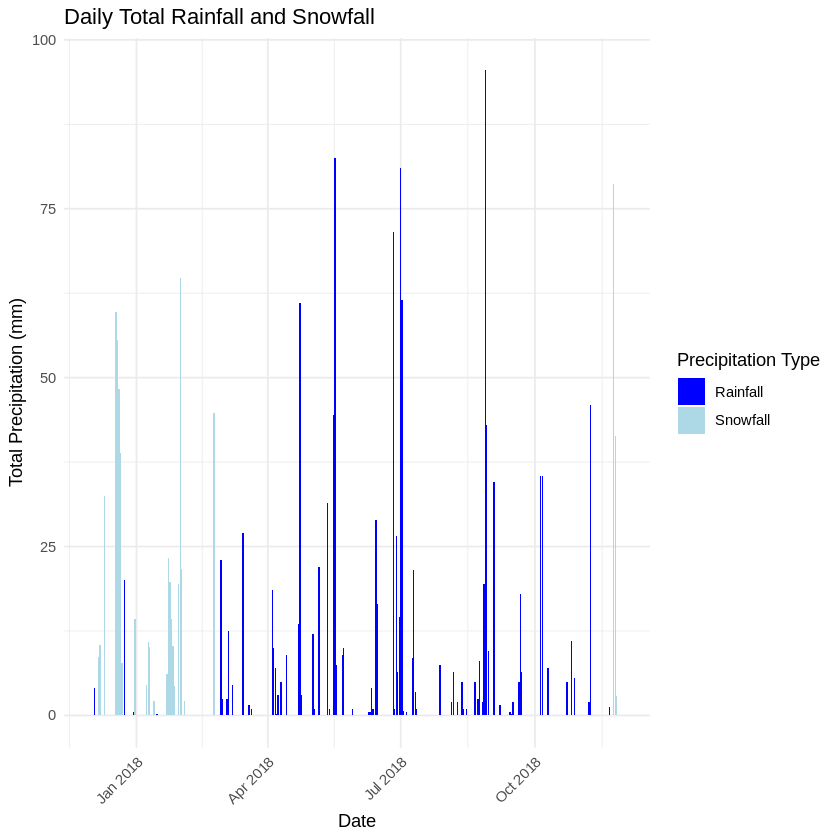

In [43]:
# Plotting the results
weather_plot <- ggplot(daily_weather, aes(x = DATE)) +
  geom_bar(aes(y = total_rainfall, fill = "Rainfall"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = total_snowfall, fill = "Snowfall"), stat = "identity", position = "dodge") +
  labs(title = "Daily Total Rainfall and Snowfall",
       x = "Date",
       y = "Total Precipitation (mm)",
       fill = "Precipitation Type") +
  scale_fill_manual(values = c("Rainfall" = "blue", "Snowfall" = "lightblue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Show the plot
print(weather_plot)


In [44]:
# Count how many days had snowfall
days_with_snowfall <- seoul_bike_sharing %>%
  filter(SNOWFALL > 0) %>%         # Filter for days with snowfall greater than 0
  distinct(DATE) %>%               # Get unique dates
  nrow()                            # Count the number of unique dates

# Print the result
print(paste("Number of days with snowfall:", days_with_snowfall))


[1] "Number of days with snowfall: 27"


There are many more visualizations we could have chosen to cover here, but the important thing was that you deepen your understanding of the dataset.  
I hope we succeeded in that endeavour!

(Keep going, you are getting closer to the finish line with each step you take. :-) )


## Further Reading
[1] 'Causal Model' (2021) _Wikipedia_. Available at "https://en.wikipedia.org/wiki/Causal_model" (Accessed: 22 April 2021).


## Author(s)

<h4> Jeff Grossman </h4>

## Contributor(s)

<h4> Yan Luo, Rav Ahuja </h4>

<!--## Change log

| Date       | Version | Changed by    | Change Description                                                                                          |
| ---------- | ------- | ------------- | ----------------------------------------------------------------------------------------------------------- |
| 2021-05-04 | 0.4     | Jeff Grossman | Remove solutions                                                                                           |
| 2021-04-23 | 0.3     | Jeff Grossman | Update per review                                                                                           |
| 2021-04-20 | 0.2     | Jeff Grossman | Push for peer review                                                                                        |
| 2021-04-05 | 0.1     | Jeff Grossman | Start content creation                                                                                    |-->


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
